In [58]:
from tensorflow.python.keras.models import load_model
from tensorflow.python.keras.preprocessing.image import load_img,img_to_array
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
import os
%matplotlib inline


In [70]:
model = load_model('neww/model.h5')

In [71]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 148, 148, 16)      448       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 74, 74, 16)        0         
_________________________________________________________________
batch_norm1 (BatchNormalizat (None, 74, 74, 16)        64        
_________________________________________________________________
conv2 (Conv2D)               (None, 72, 72, 32)        4640      
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 36, 36, 32)        0         
_________________________________________________________________
batch_norm2 (BatchNormalizat (None, 36, 36, 32)        128       
_________________________________________________________________
conv3 (Conv2D)               (None, 34, 34, 32)        9248      
__________

In [72]:
def get_prediction(img_path):
    img = load_img(img_path,target_size=(150,150))
    img_array = np.expand_dims(img_to_array(img)/255.,axis=0)
    pred = model.predict(img_array)
    if pred<0.5:
        animal = 'cat'
    else:
        animal = 'dog'
    return pred , animal,img_array

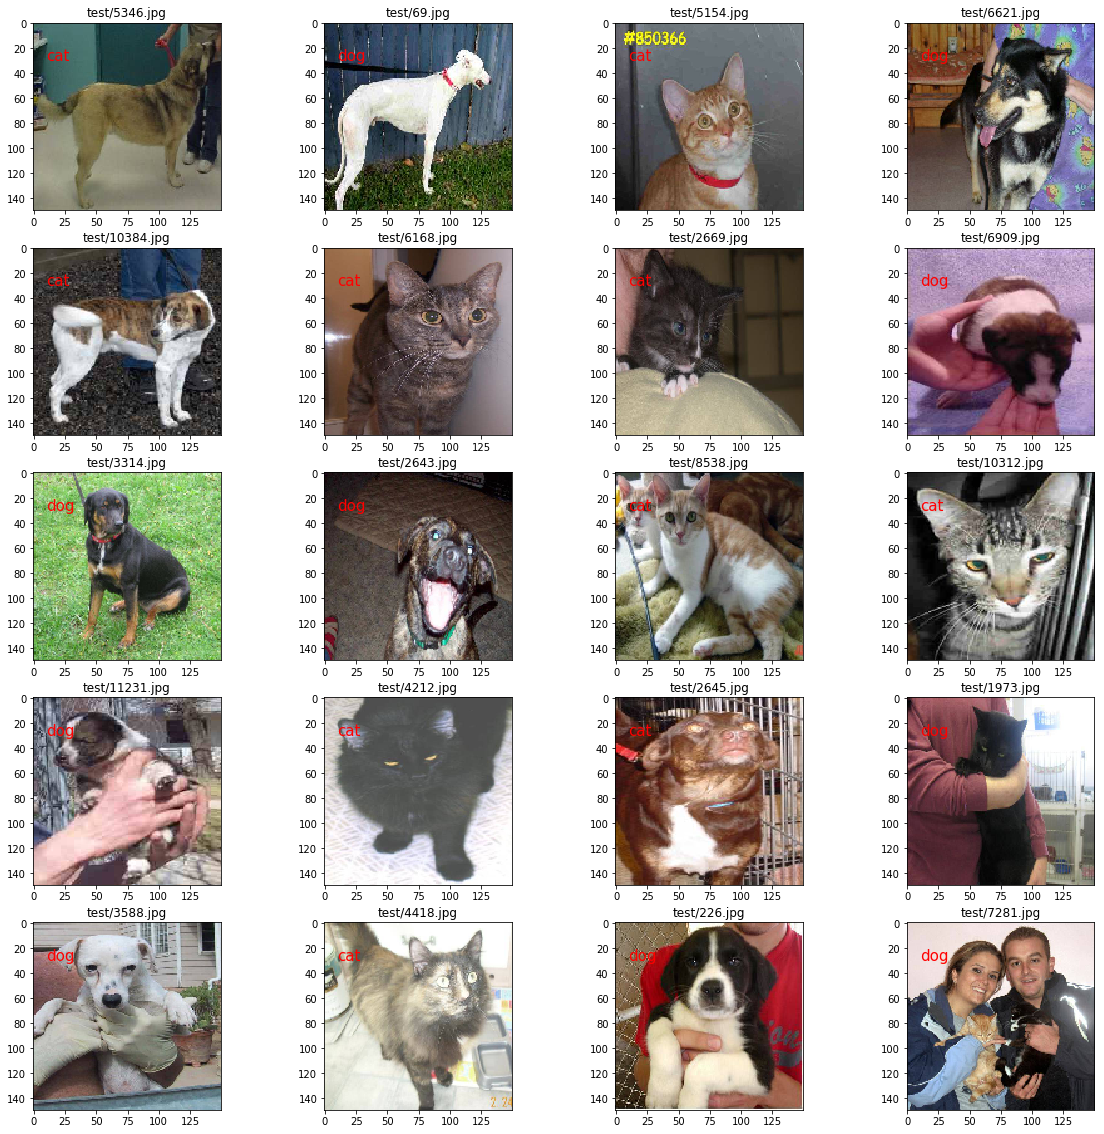

In [75]:
plt.rcParams['figure.figsize'] =(20,20)

def absolute_path(x):
    return os.path.join('test',x)

# randomly sample images 
images = list(map(absolute_path,np.random.choice(os.listdir('test'),size=(20,),replace=False)))

def view_predictions(list_images): 
    
    for i in range(len(images)): #20 hardcoded 
        plt.subplot(5,4,i+1)
        pred_score , animal ,image_array = get_prediction(list_images[i])
        #print(image_array[0])
        plt.imshow(image_array[0])
        plt.text(10,30,str(animal),fontsize=15,color='red')
        
        #helpful to check for performance for wrong classification
        plt.title(os.path.relpath(list_images[i]))
        
view_predictions(images)

In [76]:
import keras

In [80]:
from keras.utils import plot_model
plot_model(model,to_file='model.png')